In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
planets = pd.read_csv('../data/planets.csv')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from ml_utils.classification import plot_roc
from ml_utils.classification import confusion_matrix_visual

Ознакомление с данными

In [3]:
planets

,mass,description,periastrontime,semimajoraxis,discoveryyear,list,eccentricity,period,discoverymethod,lastupdate,periastron,name
0,19.4000,11 Com b is a brown dwarf-mass companion to th...,2452899.60,1.29000,2008.0,Confirmed planets,0.231,326.030000,RV,15/09/20,94.800,11 Com b
1,11.2000,11 Ursae Minoris is a star located in the cons...,2452861.04,1.54000,2009.0,Confirmed planets,0.080,516.220000,RV,15/09/20,117.630,11 UMi b
2,4.8000,14 Andromedae is an evolved star in the conste...,2452861.40,0.83000,2008.0,Confirmed planets,0.000,185.840000,RV,15/09/20,0.000,14 And b
3,4.9750,The star 14 Herculis is only 59 light years aw...,NaN,2.86400,2002.0,Confirmed planets,0.359,1766.000000,RV,15/09/21,22.230,14 Her b
4,7.6790,14 Her c is the second companion in the system...,NaN,9.03700,2006.0,Controversial,0.184,9886.000000,RV,15/09/21,189.076,14 Her c
...,...,...,...,...,...,...,...,...,...,...,...,...
4089,1.9000,Data for this planet was imported from the exo...,NaN,0.08150,2016.0,Confirmed planets,0.000,3.765001,NaN,16/12/09,NaN,XO-6 b
4090,0.7090,This planet was discovered by Crouzet et al. 2...,NaN,0.04421,2019.0,Confirmed planets,0.038,2.864142,transit,20/01/16,NaN,XO-7 b
4091,0.3334,The star YBP1194 is one of the best solar twin...,2455679.90,NaN,2014.0,Confirmed planets,0.310,6.960000,RV,18/03/23,109.160,YBP1194 b
4092,0.4000,YBP1514 is a main sequence star in the open st...,2455986.30,NaN,2014.0,Confirmed planets,0.270,5.118000,RV,18/03/23,328.580,YBP1514 b


<AxesSubplot:>

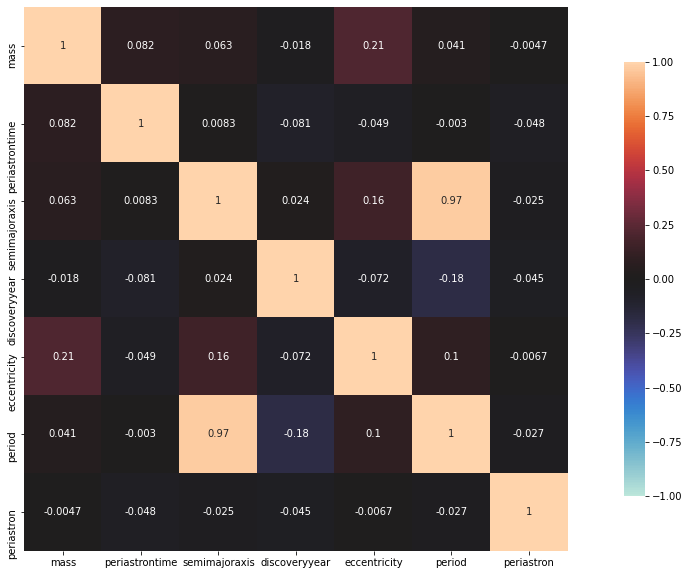

In [4]:
fig = plt.figure(figsize=(20, 10))
sns.heatmap(planets.corr(), center=0, vmin=-1, vmax=1, square=True, annot=True, cbar_kws={'shrink': 0.8}
)

In [5]:
planets[['semimajoraxis', 'eccentricity', 'mass']].describe()

,semimajoraxis,eccentricity,mass
count,1704.000000,1388.000000,1659.000000
mean,5.837964,0.159016,2.702061
std,110.668743,0.185041,8.526177
min,0.004420,0.000000,0.000008
25%,0.051575,0.013000,0.085000
50%,0.140900,0.100000,0.830000
75%,1.190000,0.230000,2.440000
max,3500.000000,0.956000,263.000000


In [6]:
planets[['period']].describe()

,period
count,3930.000000
mean,524.084969
std,7087.428665
min,0.090706
25%,4.552475
50%,12.364638
75%,46.793136
max,320000.000000


In [7]:
planets['shorter_years'] = planets.period < planets.query('name == "Earth"').period.iat[0]
planets.shorter_years.value_counts()

True     3481
False     613
Name: shorter_years, dtype: int64

Логистическая регрессия

In [8]:
data = planets[['shorter_years', 'semimajoraxis', 'mass', 'eccentricity']].dropna()
y = data.pop('shorter_years')
X = data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

lm = LogisticRegression(random_state=0).fit(X_train, y_train)
lm.score(X_test, y_test) 

0.9773462783171522

Прогноз

In [9]:
preds = lm.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.98      0.95      0.97       103
        True       0.98      0.99      0.98       206

    accuracy                           0.98       309
   macro avg       0.98      0.97      0.97       309
weighted avg       0.98      0.98      0.98       309



Получение показателей производительности

<AxesSubplot:title={'center':'ROC curve'}, xlabel='False Positive Rate (FPR)', ylabel='True Positive Rate (TPR)'>

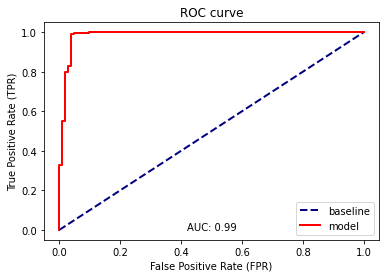

In [10]:
plot_roc(y_test, lm.predict_proba(X_test)[:,1])

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Actual', ylabel='Model Prediction'>

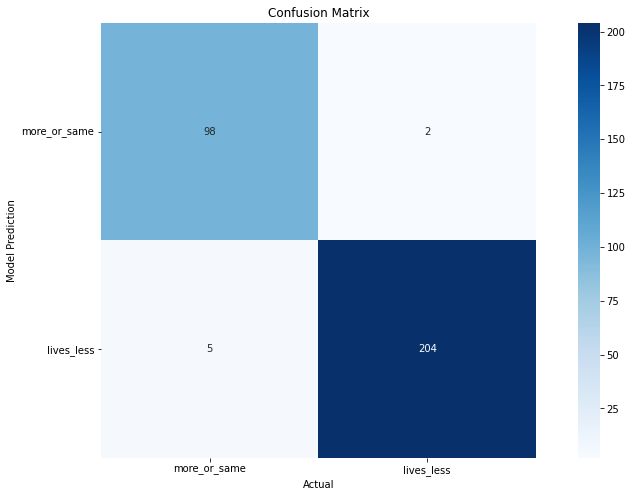

In [11]:
fig = plt.figure(figsize=(15, 8))
confusion_matrix_visual(y_test, preds, ['more_or_same', 'lives_less'])